<a href="https://colab.research.google.com/github/hinsley/colabs/blob/master/Training_Parameterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motivation

A coach has a set of tools he uses to develop a training plan and continually tailor it to the ever-evolving needs of his client. The tools among coaches across different resistance training disciplines tend to overlap almost completely. If it is possible to construct an expressive and comprehensive unified parameterization of the concepts these tools deal with, then a powerful analytical model of training becomes available to us.

# Metrics

- `AI`: Absolute Intensity. Independent of exercise variation being used, this is an absolute measure of intensity of load. If expressed as a percentage, $\text{AI} = \frac{\text{Load : kg}}{\text{1RM : kg}}$. Otherwise, AI specifies the weight of a training load.
- `AV`: Absolute Volume. Generally this is an expression of total work performed. For instance, if a trainee performs a total of 35 repetitions with a load of 205 kilograms, the absolute volume is $35 \cdot 205 = 7175 \text{kg}$.
- `INOL`: Intensity \* Number Of Lifts. Popularized by Hristo Hristov, this metric is commonly used to gauge the systemic stress induced by a training prescription, as well as to compare the relative stimulus incurred from multiple *groups* of sets with varying loading schemes and of varying quantities of repetitions. The name of this metric is a misnomer, as demonstrated by the non-linear denominator in the formula: $\text{INOL} = \frac{\text{Sets Performed} \cdot \text{Repetitions Per Set}}{100 - \text{(% Relative Intensity)} \cdot 100}$.
- `Intensity`: We use the term Intensity to refer to loads via various metrics. The most common unit is a percentage of one-repetition maximum load used, but may also be given as a RIR or RPE rating.
- `IA`: Intensity Amplitude. In performing similar or accessory exercises to a competition movement, a trainee will often be able to perform more or fewer repetitions of the variation than he would of the competition movement. Therefore IA is used to calculate RI, as it gives an indication of various factors like systemic stress (transitively via INOL). $\text{IA} = \frac{\text{Competition Movement 1RM}}{\text{Variation Movement 1RM}}$.
- `IM`: Intensity Modifier. Used for deloads or progressive overloads, often varying per microcycle, IM is a way of linearly scaling training loads for a set of training prescriptions. 
- `Maximum Repetitions`: The quantity of repetitions of a movement a trainee may perform in order to reach failure.
- `ORM` / `1RM`: One-Repetition Maximum. The maximum load that may be used such that a set of one repetition has a RIR rating of zero.
- `RI`: Relative Intensity. $\text{RI} = \frac{\text{AI} \cdot \text{IM}}{\text{IA}}$.
- `REQ`: Repetition-Endurance Quotient. This is used as a linear gauge of how close to failure a set is. The formula is $\text{REQ} = \frac{\text{Repetitions Performed}}{\text{Maximum Repetitions}}$. This metric may be used to predict technical quality of repetitions in a set.
- `R-INOL`: Relative INOL. This is a somewhat well-known metric for scaling INOL ratings across different types of movements, so that their systemic stress can be compared and used to evaluate overall training stimulus. I argue that this system is too subjective and imprecise, varying excessively in precision from one trainee to another. A more empirical procedural method is used to derive overall stimulus needed to achieve a desired adaptive effect.
- `RIR`: Repetitions In Reserve. After completing a set, RIR denotes the quantity of *additional* repetitions that would be required to reach failure. For instance, if one is able to complete 10 repetitions, but only performs 6, the set has a RIR rating of 4.
- `RIR falloff`: Given a training prescription with at least the following constraints: `_xB @ L | XX:XX` (quantity of sets is not required), RIR falloff is an integer-valued function (typically linear) with real-valued result ($\text{RIR falloff} : \mathbb{N} \mapsto \mathbb{R}$) expressing how much RIR will decrease (or, perhaps usefully in the context of circuit training, increase) per set performed.
- `RV`: Relative Volume. This is generally an expression of work performed in multiples of a 1RM load, given by the equation $\text{RV} = \text{RI} \cdot \text{Total Repetitions Performed}$. For instance, if a trainee performs a total of 35 repetitions at 82.5% of 1RM, this may be expressed as a relative volume of $35 \cdot 0.825 = 28.875$.
- `SV`: Set Volume. Simply put, this metric denotes sets total sets performed of some group of movements over a certain period of time.

In [0]:
from typing import Callable, List, Tuple, Union

In [3]:
import numpy as np
import pandas as pd

columns = ["Movement", "Sets", "Repetitions", "Load (% 1RM)"]

def add_row(df: pd.DataFrame, row: List[Union[str, int, float]]) -> None:
  return df.append(dict(zip(columns, row)), ignore_index=True)

df = pd.DataFrame(columns=columns)

rows = [
  ["Squat", 3, 5, 0.8],
  ["Bench Press", 1, 15, 0.65],
  ["Bench Press", 1, 12, 0.675],
  ["Bench Press", 3, 10, 0.7],
  ["Front Squat", 4, 4, 0.875],
]

for row in rows:
  global df
  df = add_row(df, row)

df["INOL"] = df["Sets"] * df["Repetitions"] / (1 - df[r"Load (% 1RM)"]) / 100
df

,Movement,Sets,Repetitions,Load (% 1RM),INOL
0,Squat,3,5,0.800,0.75
1,Bench Press,1,15,0.650,0.428571
2,Bench Press,1,12,0.675,0.369231
3,Bench Press,3,10,0.700,1
4,Front Squat,4,4,0.875,1.28


In [0]:
df_mvmt = df.groupby("Movement")

In [5]:
print("Total INOL")

df_mvmt.apply(lambda mvmt: sum(mvmt["INOL"]))

Total INOL


Movement
Bench Press    1.797802
Front Squat    1.280000
Squat          0.750000
dtype: float64

In [6]:
print("Set Volume")

df_mvmt.apply(lambda mvmt: sum(mvmt["Sets"]))

Set Volume


Movement
Bench Press    5
Front Squat    4
Squat          3
dtype: int64

In [7]:
print("Total Repetitions")

df_mvmt.apply(lambda mvmt: np.dot(mvmt["Sets"], mvmt["Repetitions"]))

Total Repetitions


Movement
Bench Press    57
Front Squat    16
Squat          15
dtype: int64

# One-Rep Maximum Formulas

In the following equations, $r$ denotes maximum number of repetitions possible and $w$ denotes weight of training load.

### Epley

$\text{1RM} = w \left( 1 + \frac{r}{30} \right)$

### Brzycki

$\text{1RM} = w \cdot \frac{36}{37 - r}$

### McGlothin

$\text{1RM} = \frac{100w}{101.3 - 2.67123r}$

### Lombardi

$\text{1RM} = w\sqrt[10]{r} = wr^{0.1}$

### Mayhew

$\text{1RM} = \frac{100w}{52.2 + 41.9e^{-0.055r}}$

### O'Conner

$\text{1RM} = w \left( 1 + \frac{r}{40} \right)$

### Wathen

$\text{1RM} = \frac{100w}{48.8 + 53.8e^{-0.075r}}$

In [0]:
import math
import sympy
from typing import Union

class Formula:

  o, w, r = sympy.symbols("o w r")

  @classmethod
  def calculate(cls,
                solve_for: sympy.Symbol,
                orm: float=None,
                weight: float=None,
                reps: float=None):
    if solve_for == cls.o:
      return sympy.solve(cls.zero.subs(cls.w, weight).subs(cls.r, reps), solve_for)[0]
    elif solve_for == cls.w:
      return sympy.solve(cls.zero.subs(cls.o, orm).subs(cls.r, reps), solve_for)[0]
    elif solve_for == cls.r:
      return sympy.solve(cls.zero.subs(cls.o, orm).subs(cls.w, weight), solve_for)[0]
  
  @classmethod
  def orm(cls, weight: float, reps: int) -> float:
    return cls.calculate(Formula.o, weight=weight, reps=reps)

  @classmethod
  def max_reps(cls,
               orm: float,
               weight: float,
               round_down=True) -> Union[int, float]:
    result = cls.calculate(Formula.r, orm=orm, weight=weight)
    return math.floor(result) if round_down else result

  @classmethod
  def rep_max(cls, orm: float, reps: int) -> float:
    return cls.calculate(Formula.w, orm=orm, reps=reps)

class ORM:
  """
  Calculators for one-repetition maximum and other associated measures.

  - `Formula.orm` takes in a weight used and number of repetitions performed and
  returns the one-repetition maximum.
  - `Formula.max_reps` takes in a one-repetition maximum and a weight to be used
  and returns the number of repetitions one may complete in a single set. Note
  that the return value is a float. The floor of this value must be taken to get
  a physically meaningful quantity.
  - `Formula.rep_max` takes in a one-repetition maximum and number of
  repetitions to be completed in a set and returns the maximum weight one may
  use. 
  """

  class Epley(Formula):

    zero = Formula.w * (1 + Formula.r / 30) - Formula.o

  class Brzycki(Formula):

    zero = Formula.w * 36 / (37 - Formula.r) - Formula.o

  class McGlothin(Formula):

    zero = 100 * Formula.w / (101.3 - 2.67123 * Formula.r) - Formula.o
      
  class Lombardi(Formula):

    zero = Formula.w * (Formula.r ** 0.1) - Formula.o
      
  class Mayhew(Formula):
      
    zero = 100 * Formula.w / (52.2 + 41.9 * (math.e ** (-0.055 * Formula.r))) - Formula.o

  class OConner(Formula):

    zero = Formula.w * (1 + Formula.r / 40) - Formula.o

  class Wathen(Formula):

    zero = 100 * Formula.w / (48.8 + 53.8 * (math.e ** (-0.075 * Formula.r))) - Formula.o


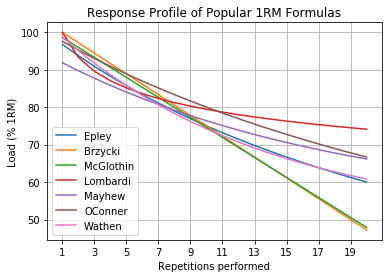

In [9]:
from matplotlib import pyplot as plt

rep_upper_limit = 20

rep_range = range(1, rep_upper_limit + 1)

fig = plt.figure(facecolor="w")
plt.title("Response Profile of Popular 1RM Formulas")
plt.ylabel("Load (% 1RM)")
plt.xlabel("Repetitions performed")
plt.xticks(range(1, rep_upper_limit, 2))
plt.grid()

for formula in [var for var in vars(ORM) if not var.startswith("__")]:
  plt.plot(rep_range,
           [getattr(ORM, formula).rep_max(100, reps) for reps in rep_range],
           label=formula)

plt.legend()
plt.show()

Given that the actual maximal % 1RM performed at 1 rep is going to be exactly 100%, we can rule out Mayhew's formula as probably less accurate than the others. And because McGlothin and Brzycki are so similar, and Brzycki produces the correct repetition maximum load at 1 rep, we can use Brzycki virtually any time McGlothin would work. We are left with the following formulas:

- Epley,
- Brzycki,
- Lombardi, and
- Wathen (and the perhaps obsolete O'Conner).

Anecdotally, Lombardi and Wathen seem to produce the most accurate predictions.

***But how can we do better?***

Obviously the response profile is going to vary with each trainee and each movement performed.

### TODO: Explain the following (data acquisition methods, rationale for Lagrange polynomial interpolation attempt, explanation of reciprocal function being similar to Brzycki, Wathen, etc.), clean up names (`f_val` is pretty undescriptive).

In [0]:
f_val = {
    1: 100,
    2: 91.5,
    3: 92,
    5: 85,
    7: 86,
    10: 75,
}

In [0]:
from scipy.interpolate import lagrange

xs, ys = zip(*[(r, f_val[r]) for r in f_val])

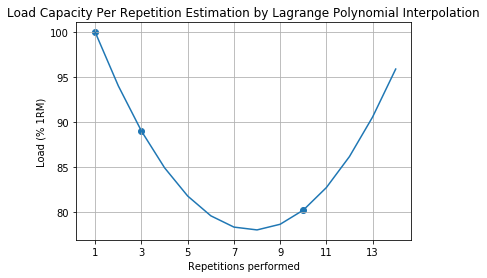

1RM: 100.00000000000001


In [27]:
poly = lagrange(reps, intensities)
xs = range(1, 15)
ys = [poly(x) for x in xs]

fig = plt.figure(facecolor="w")
plt.title("Load Capacity Per Repetition Estimation by Lagrange Polynomial Interpolation")
plt.ylabel("Load (% 1RM)")
plt.xlabel("Repetitions performed")
plt.xticks(range(1, rep_upper_limit, 2))
plt.grid()

plt.scatter(reps, intensities) # Plot real data points.
plt.plot(xs, ys) # Plot interpolated curve.
plt.show()

print(f"1RM: {poly(1)}")

This is pretty terrible, as the extrapolation to the right of the data set is obviously impossible. Let's try fitting a reciprocal function to the dataset, using the function $f(r) = \frac{a}{x - b} + c$.

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


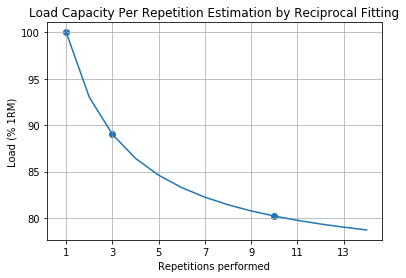

max_load(repetitions) = 74.3589743589739 + 68.3760683760716/(repetitions + 1.66666666666675)


In [29]:
import numpy as np
from scipy.optimize import curve_fit
from random import randint
from sympy import symbols

def reciprocal_curve(x, a, b, c):
  # TODO: Prune f_val to make it prefer data points with lower reps (n-duplication).
  return abs(a) / (x + abs(b)) + abs(c)

initial_guesses = [0, 0, 0]
while True:
  try:
    popt, pcov = curve_fit(reciprocal_curve, reps, intensities, p0=initial_guesses)
  except RuntimeError:
    initial_guesses = [guess + randint(-1, 1) for guess in initial_guesses]
  else:
    break

curve = lambda x: reciprocal_curve(x, *popt)

fig = plt.figure(facecolor="w")
plt.title("Load Capacity Per Repetition Estimation by Reciprocal Fitting")
plt.ylabel("Load (% 1RM)")
plt.xlabel("Repetitions performed")
plt.xticks(range(1, rep_upper_limit, 2))
plt.grid()

plt.scatter(reps, intensities)
plt.plot(xs, curve(xs))
plt.show()

x = symbols("repetitions")

print(f"max_load(repetitions) = {curve(x)}")

That's a great result!

# Prilepin's Chart of Training Volume

In [0]:
import pandas as pd

prilepin = pd.DataFrame({
    "Percent": [(55, 65), (70, 80), (80, 90), (90, 95)],
    "Reps/set": [(3, 6), (3, 6), (2, 4), (1, 2)],
    "Optimal": [24, 18, 15, 4],
    "Total Range": [(18, 30), (12, 24), (10, 20), (10,)]
})

prilepin

In [0]:
prilepin["INOL (Optimal)"] = tuple(map((lambda data: [round(data[0] / load, 2) for
                                                      load in
                                                      data[1]]),
                                       zip(prilepin["Optimal"],
                                           prilepin["Percent"])))

prilepin["INOL (Range)"] = tuple(map(lambda data: [[round(load / reps, 2) for load in data[1]] for reps in data[0]], zip(prilepin["Total Range"], prilepin["Percent"])))

prilepin